# Malaysia Disease Prediction Using BPNN

## Pre-processing 

In [2]:
# import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('data/Training.csv')
test= pd.read_csv('data/Testing.csv')
train.head()

,itching,skin_rash,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,red_spots_over_body,watering_from_eyes,increased_appetite,polyuria,lack_of_concentration,visual_disturbances,pus_filled_pimples,blackheads,scurring,prognosis
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [4]:
train.shape

(1440, 58)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   itching                       1440 non-null   int64
 1   skin_rash                     1440 non-null   int64
 2   continuous_sneezing           1440 non-null   int64
 3   shivering                     1440 non-null   int64
 4   chills                        1440 non-null   int64
 5   joint_pain                    1440 non-null   int64
 6   stomach_pain                  1440 non-null   int64
 7   acidity                       1440 non-null   int64
 8   ulcers_on_tongue              1440 non-null   int64
 9   muscle_wasting                1440 non-null   int64
 10  vomiting                      1440 non-null   int64
 11  fatigue                       1440 non-null   int64
 12  weight_loss                   1440 non-null   int64
 13  restlessness                  144

In [6]:
train.isna().sum() # calculation of the missing value

itching                         0
skin_rash                       0
continuous_sneezing             0
shivering                       0
chills                          0
joint_pain                      0
stomach_pain                    0
acidity                         0
ulcers_on_tongue                0
muscle_wasting                  0
vomiting                        0
fatigue                         0
weight_loss                     0
restlessness                    0
lethargy                        0
patches_in_throat               0
irregular_sugar_level           0
cough                           0
high_fever                      0
breathlessness                  0
sweating                        0
indigestion                     0
headache                        0
nausea                          0
loss_of_appetite                0
pain_behind_the_eyes            0
back_pain                       0
diarrhoea                       0
mild_fever                      0
swelled_lymph_

In [7]:
train.nunique()

itching                          2
skin_rash                        2
continuous_sneezing              2
shivering                        2
chills                           2
joint_pain                       2
stomach_pain                     2
acidity                          2
ulcers_on_tongue                 2
muscle_wasting                   2
vomiting                         2
fatigue                          2
weight_loss                      2
restlessness                     2
lethargy                         2
patches_in_throat                2
irregular_sugar_level            2
cough                            2
high_fever                       2
breathlessness                   2
sweating                         2
indigestion                      2
headache                         2
nausea                           2
loss_of_appetite                 2
pain_behind_the_eyes             2
back_pain                        2
diarrhoea                        2
mild_fever          

In [8]:
X = train.drop('prognosis',axis=1)
X #X are in DataFrame, its easy to change it into array to match with the target

,itching,skin_rash,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,muscle_pain,red_spots_over_body,watering_from_eyes,increased_appetite,polyuria,lack_of_concentration,visual_disturbances,pus_filled_pimples,blackheads,scurring
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1436,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1437,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1438,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
# # change X DataFrame into array 
# x = np.array(X)
# x.shape

In [10]:
# y = np.array(train['prognosis'])
# y = pd.get_dummies(y).values
# y.shape

## Split Dataset

In [11]:
X = train.drop('prognosis',axis=1) #X are in DataFrame, its easy to change it into array to match with the target
x = np.array(X) # change X DataFrame into array 

y = np.array(train['prognosis'])
y = pd.get_dummies(y).values

# split data to 80/20 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [12]:
# split data to 80/20 
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
y_train.shape

(720, 12)

## Initialization of the parameters

In [14]:
##### Initialize variables
learning_rate = 0.1
iterations = 6000
N = y_train.size

# number of input features
input_size = 57

# number of hidden layers neurons
hidden_size = 50

# number of neurons at the output layer
output_size = 12

results = pd.DataFrame(columns=["mse", "accuracy"])

In [15]:
# Initialize weights
np.random.seed(10)


# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

## Function for Backpropagation

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

## Backpropagation Process

In [36]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

C:\Users\Izzham Burhan\AppData\Local\Temp\ipykernel_11232\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Izzham Burhan\AppData\Local\Temp\ipykernel_11232\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Izzham Burhan\AppData\Local\Temp\ipykernel_11232\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Izzham Burhan\AppData\Local\Temp\ipykernel_11232\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pand

In [18]:
A2.argmax(axis=1)

array([ 6,  8,  0,  8,  4,  1,  6,  5,  0,  2,  0,  1,  8,  6,  6,  8,  8,
        2,  7,  1,  5,  5,  6,  2,  7, 10,  1,  6,  9,  9,  5,  1,  1,  2,
        2,  1,  1,  2,  3,  1,  3,  1,  5,  0,  4,  8,  0,  0,  7,  3,  7,
        3,  2,  7,  2, 10,  3,  1,  6,  0,  1,  4,  7,  4,  4,  8,  4,  2,
        9,  0,  4,  1,  8,  6,  4,  0,  2,  0,  0,  8,  6,  6,  9,  1,  2,
        4,  5,  4,  8, 10,  3,  5,  1,  8, 10,  2,  8,  5,  4,  1,  2,  1,
        4,  0,  6,  1,  6,  3, 10,  8,  3,  1,  4,  9,  3,  2,  5,  5,  2,
        3,  9,  0,  8,  0,  8,  7,  1,  2,  3,  2,  6,  1,  3,  1,  5,  1,
        1,  6, 10,  9,  6,  0,  8,  2,  3, 10,  3,  3, 10,  0,  7,  7,  1,
       10,  0,  9,  6,  3,  2,  2,  8,  0,  4,  5,  4,  1,  8,  7,  9,  0,
        7,  3,  7,  5,  5,  7,  5,  6,  5,  4,  8,  6,  1,  5,  1,  5,  8,
       10,  7,  5,  1,  2,  1, 10,  1,  9,  5,  1,  1,  3,  0,  7,  8,  9,
        6, 10,  5,  5,  1,  9,  1,  9,  3,  0,  8,  1,  6,  2,  9,  0,  6,
        5,  6,  1,  3,  9

### Result Training

In [39]:
results.mse.plot(title="Mean Squared Error")
plt.tight_layout()
plt.savefig("images/mse.png",dpi=120) 
plt.close()

In [38]:
print("Accuracy: {}".format(acc))
results.accuracy.plot(title="Accuracy")

plt.tight_layout()
plt.savefig("images/accuracy.png",dpi=120) 
plt.close()

Accuracy: 0.9222222222222223


<AxesSubplot:title={'center':'Mean Squared Error'}>

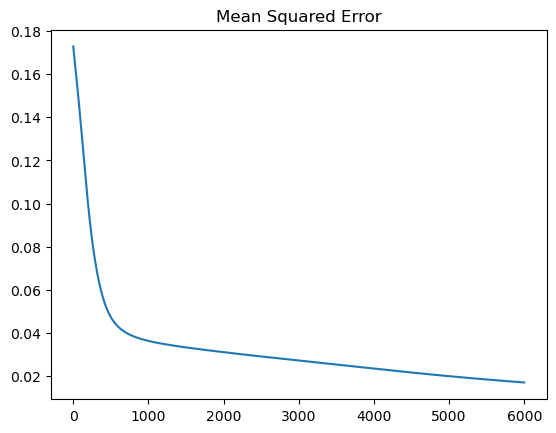

In [34]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

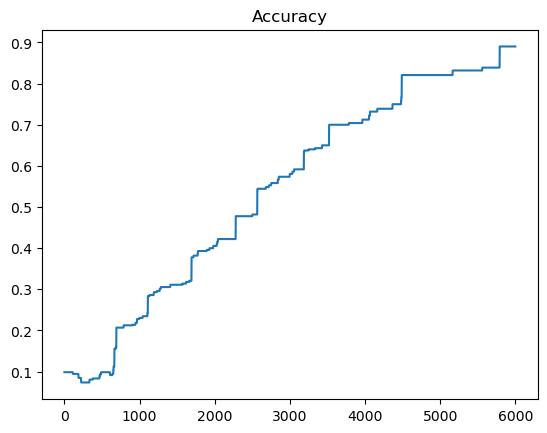

In [30]:
results.accuracy.plot(title="Accuracy")

## Testing 

In [21]:
## TEST
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8847222222222222


In [22]:
# results_test = pd.DataFrame(columns=["mse", "accuracy"]) 
# results_test=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
# results_test

In [23]:
y_test.argmax(axis=1)

array([ 0,  8, 10,  2,  1,  3,  4,  2,  3,  9,  5,  5,  1,  5, 11,  2,  5,
        8,  8, 10,  1,  2,  5, 11, 11,  7,  1,  1,  8,  1,  0,  1,  8,  2,
        8,  5,  9,  6,  0,  3,  0,  0,  2,  0,  8,  9,  2, 11,  6,  8,  9,
        4,  7,  1,  1,  5,  4,  8,  9,  2, 10, 10,  3,  7,  1,  5,  6,  4,
        8,  1,  2,  7, 10, 11,  4,  6,  8,  3, 11,  9,  4,  8,  2, 10,  3,
        8,  6,  0,  9,  7,  6, 10,  3,  2, 10, 10,  2,  8, 11,  7,  3,  9,
       10,  2,  7,  7, 10, 11,  0,  4,  8,  1,  7,  4,  8, 10,  0,  8,  4,
        6,  9,  1,  3,  9,  5,  0,  6, 11,  0, 10,  4, 10, 11,  2,  6,  1,
        4,  7,  8,  8, 10, 11,  0,  6,  1,  9,  4,  5,  2,  3,  9, 11,  9,
        6, 11,  4,  0,  3,  3,  4,  5,  4,  4,  1,  2,  7,  3,  9,  9, 11,
        9,  0,  5, 10,  2, 11, 11, 10,  4,  0,  3,  8,  0,  8,  5,  0,  8,
        4,  4,  6, 11,  3, 11,  3,  7,  4,  1,  7,  8,  6,  3,  0,  2,  4,
        7,  0,  0,  5,  8,  8,  1,  3,  4,  4,  0, 10,  9,  7,  8, 10,  9,
        0,  1,  7, 10,  3

In [24]:
A2.argmax(axis=1)

array([ 0,  8, 10,  2,  1,  3,  4,  2,  3,  7,  5,  5,  1,  5,  1,  2,  5,
        8,  8, 10,  1,  2,  5,  1,  1,  7,  1,  1,  8,  1,  0,  1,  8,  2,
        8,  5,  9,  6,  0,  3,  0,  0,  2,  0,  8,  9,  2,  0,  6,  8,  7,
        4,  7,  1,  1,  5,  4,  8,  9,  2, 10, 10,  3,  7,  1,  5,  6,  4,
        8,  1,  2,  7, 10,  0,  4,  6,  8,  3,  1,  9,  4,  8,  2, 10,  3,
        8,  6,  0,  9,  7,  6, 10,  3,  2, 10, 10,  2,  8,  6,  7,  3,  9,
       10,  2,  7,  7, 10,  1,  0,  4,  8,  1,  7,  4,  8, 10,  0,  8,  4,
        6,  9,  1,  3, 10,  5,  0,  6,  6,  0, 10,  4, 10,  1,  2,  6,  1,
        4,  7,  8,  8, 10,  0,  0,  6,  1,  0,  4,  5,  2,  3,  9,  1,  9,
        6,  1,  4,  0,  3,  3,  4,  5,  4,  4,  1,  2,  7,  3,  9,  9,  0,
        0,  0,  5, 10,  2,  1,  1, 10,  4,  0,  3,  8,  0,  8,  5,  0,  8,
        4,  4,  6,  1,  3,  1,  3,  7,  4,  1,  7,  8,  6,  3,  0,  2,  4,
        7,  0,  0,  5,  8,  8,  1,  3,  4,  4,  0, 10,  9,  7,  8, 10,  9,
        0,  1,  7, 10,  3

In [25]:
predictions_df = pd.DataFrame( list(A2.argmax(axis=1)), list(y_test.argmax(axis=1)) , columns=['predicted'] )
predictions_df = predictions_df.reset_index()
predictions_df = predictions_df.rename(columns={'index':'prognosis'})

predictions_df['result'] = ''

for x in range(len(predictions_df)) :
    if predictions_df['prognosis'][x] == predictions_df['predicted'][x] :
        predictions_df['result'].iloc[x]='Correct'
    else :
        predictions_df['result'].iloc[x]='Incorrect'

C:\Users\Izzham Burhan\AppData\Local\Temp\ipykernel_11232\3103888810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df['result'].iloc[x]='Correct'
C:\Users\Izzham Burhan\AppData\Local\Temp\ipykernel_11232\3103888810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df['result'].iloc[x]='Incorrect'


In [26]:
predictions_df

,prognosis,predicted,result
0,0,0,Correct
1,8,8,Correct
2,10,10,Correct
3,2,2,Correct
4,1,1,Correct
...,...,...,...
715,0,0,Correct
716,11,1,Incorrect
717,4,4,Correct
718,0,0,Correct


In [27]:
correct = len(predictions_df[predictions_df['result']=='Correct'])
total = len(predictions_df)
print(f'{correct} correct prediction out of {total}')

637 correct prediction out of 720


In [28]:
# list(A2.argmax(axis=1))

In [28]:
# list(y_test.argmax(axis=1))